In [1]:
import re
import nltk
import os
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import wordcloud

%matplotlib inline
#plt.rcParams["figure.figsize"] = (40,20)

In [2]:
listAtas = os.listdir("atas")

In [3]:
corpus = []

for ata in listAtas:
    with open("atas/" + ata,'rt', encoding='utf-8') as f:
        lines = f.readlines()
        if lines: 
            lines = ' '.join(lines)
            corpus.append(lines)

print(len(corpus),"atas")

227 atas


# Corpus Characteristics 

In [4]:
%%time
corpusJoined = ' '.join(corpus)
corpusJoinedWithoutPunctuation =  re.sub(r'[^\w\s]','',corpusJoined)
corupsWordTokenized = nltk.word_tokenize(corpusJoined)
corupsWordTokenizedWithoutPunctuation = nltk.word_tokenize(corpusJoinedWithoutPunctuation)
corpusJoinedWithoutSpaces = re.sub(' ','', corpusJoined)
corpusSentences = nltk.tokenize.sent_tokenize(corpusJoined)

CPU times: user 11.5 s, sys: 87.4 ms, total: 11.6 s
Wall time: 11.6 s


In [5]:
print("Number of characters with spaces: ", len(corpusJoined))
print("Number of characters without spaces: ", len(corpusJoinedWithoutSpaces))
print("Number of words: ",len(corupsWordTokenizedWithoutPunctuation))
print("Number of sentences: ", len(corpusSentences))
print("Number of characters per words: ", len(corpusJoinedWithoutSpaces)/len(corupsWordTokenizedWithoutPunctuation))
print("Number of words per sentence: ", len(corupsWordTokenizedWithoutPunctuation)/len(corpusSentences))

Number of characters with spaces:  7596414
Number of characters without spaces:  6391984
Number of words:  1187518
Number of sentences:  49290
Number of characters per words:  5.382641778903562
Number of words per sentence:  24.09247311827957


# Frequencies 

In [6]:
corpusJoined = corpusJoined.lower()
for i in range(0,len(corpus)):
    corpus[i]=corpus[i].lower()
    corpus[i] = re.sub('\n','',corpus[i]) #remove newline character

In [7]:
Mystopwords = ['ainda','ante','p','r','sobre'] + ['janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro','mês','meses','ano','anos'] + [str(i) for i in range(10)] + nltk.corpus.stopwords.words('portuguese')


## Character frequency 

In [8]:
charCountVect = CountVectorizer(analyzer='char')
charCountVect.fit(corpus);

In [9]:
bagOfChar = charCountVect.transform(corpus)
sumChars = bagOfChar.sum(axis=0)
charsFreq = [(char, sumChars[0, idx]) for char, idx in charCountVect.vocabulary_.items()]
charsFreq =sorted(charsFreq, key = lambda x: x[1], reverse=True)

In [10]:
numberOfChars = 20
yPos = np.arange(numberOfChars)
objects = []
performance = []
for i in range(numberOfChars):
    aux = charsFreq[i]
    objects.append(aux[0])
    performance.append(aux[1])

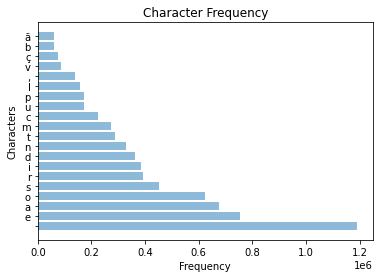

In [11]:
#horizontal bars
plt.barh(yPos, performance, align='center', alpha=0.5)
plt.yticks(yPos, objects)
plt.xlabel('Frequency')
plt.ylabel('Characters')
plt.title('Character Frequency')
plt.show()


## Word Frequency

In [12]:
# number of words in the barplots
numberOfWords = 20

### With stop words

In [13]:
wordCountVect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
wordCountVect.fit(corpus);

In [14]:
bagOfWords = wordCountVect.transform(corpus)
sumWords = bagOfWords.sum(axis=0)
wordsFreq = [(word, sumWords[0, idx]) for word, idx in wordCountVect.vocabulary_.items()]
wordsFreq =sorted(wordsFreq, key = lambda x: x[1], reverse=True)

In [15]:
yPos = np.arange(numberOfWords)
objects = []
performance = []
for i in range(numberOfWords):
    aux = wordsFreq[i]
    objects.append(aux[0])
    performance.append(aux[1])


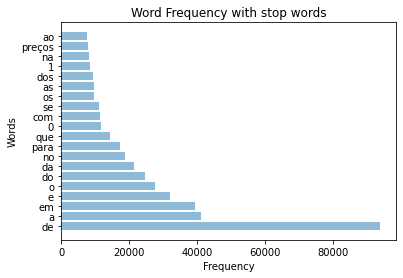

In [16]:
plt.barh(yPos, performance, align='center', alpha=0.5)
plt.yticks(yPos, objects)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Word Frequency with stop words')
plt.show()


### Wordcloud with stop words

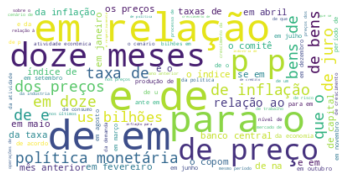

In [17]:
cloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate(corpusJoined)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Without stop words

In [18]:
wordCountVect2 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words = Mystopwords)
wordCountVect2.fit(corpus);

In [19]:
bagOfWords2 = wordCountVect2.transform(corpus)
sumWords2 = bagOfWords2.sum(axis=0)
wordsFreq2 = [(word, sumWords2[0, idx]) for word, idx in wordCountVect2.vocabulary_.items()]
wordsFreq2 =sorted(wordsFreq2, key = lambda x: x[1], reverse=True)

In [20]:
yPos = np.arange(numberOfWords)
objects = []
performance = []
for i in range(numberOfWords):
    aux = wordsFreq2[i]
    objects.append(aux[0])
    performance.append(aux[1])

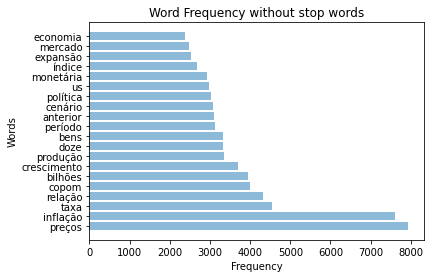

In [21]:
plt.barh(yPos, performance, align='center', alpha=0.5)
plt.yticks(yPos, objects)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Word Frequency without stop words')
plt.show()

### Wordcloud without stop words

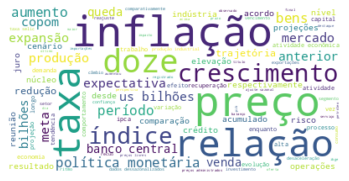

In [22]:
cloud = wordcloud.WordCloud(stopwords=Mystopwords, max_font_size=50, max_words=100, background_color="white").generate(''.join(corpus))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Bigram Frequency
 

### With stop words

In [23]:
numberOfBigrams = 20

In [24]:
bigramCountVect = CountVectorizer(analyzer='word', ngram_range=(2, 2))
bigramCountVect.fit(corpus);

In [25]:
bagOfBigrams = bigramCountVect.transform(corpus)
sumBigrams = bagOfBigrams.sum(axis=0)
bigramsFreq = [(bigram, sumBigrams[0, idx]) for bigram, idx in bigramCountVect.vocabulary_.items()]
bigramsFreq =sorted(bigramsFreq, key = lambda x: x[1], reverse=True)

In [26]:
yPos = np.arange(numberOfBigrams)
objects = []
performance = []
for i in range(numberOfBigrams):
    aux = bigramsFreq[i]
    objects.append(aux[0])
    performance.append(aux[1])

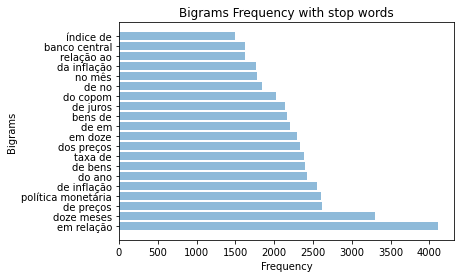

In [27]:
plt.barh(yPos, performance, align='center', alpha=0.5)
plt.yticks(yPos, objects)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Bigrams Frequency with stop words')
plt.show()


### bigram cloud with stop words

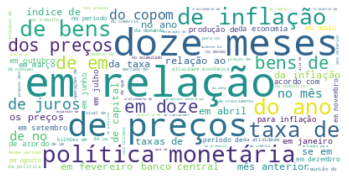

In [28]:
cloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(dict(bigramsFreq))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Without stopwords

In [29]:
bigramCountVect2 = CountVectorizer(analyzer='word', ngram_range=(2, 2),stop_words = Mystopwords)
bigramCountVect2.fit(corpus);

In [30]:
bagOfBigrams2 = bigramCountVect2.transform(corpus)
sumBigrams2 = bagOfBigrams2.sum(axis=0)
bigramsFreq2 = [(bigram, sumBigrams2[0, idx]) for bigram, idx in bigramCountVect2.vocabulary_.items()]
bigramsFreq2 =sorted(bigramsFreq2, key = lambda x: x[1], reverse=True)

In [31]:
yPos = np.arange(numberOfBigrams)
objects = []
performance = []
for i in range(numberOfBigrams):
    aux = bigramsFreq2[i]
    objects.append(aux[0])
    performance.append(aux[1])

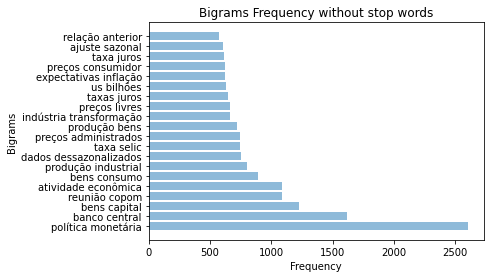

In [32]:
plt.barh(yPos, performance, align='center', alpha=0.5)
plt.yticks(yPos, objects)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Bigrams Frequency without stop words')
plt.show()

### bigrams cloud without stop words

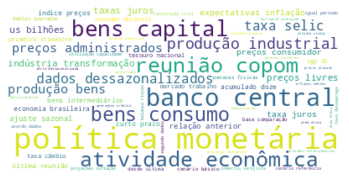

In [33]:
cloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(dict(bigramsFreq2))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
